# Example of using i-nessai

This examples shows the basic usage of the importance nested sampler in nessai.


# Initial setup

In [11]:
from nessai.flowsampler import FlowSampler
from nessai.model import Model
from nessai.plot import corner_plot
from nessai.utils import setup_logger
import numpy as np

%matplotlib inline

We then set the output directory and configure the logger.

In [2]:
output = "inessai_example"
setup_logger(output=output)

04-16 16:39 nessai INFO    : Running Nessai version 0.12.0a2.dev66+g36d262f


<Logger nessai (INFO)>

## Defining the model

As per usual we, define model which contains the log-likelihood and log-prior.

In [3]:
class Rosenbrock(Model):
    """A Rosenbrock model"""

    def __init__(self, dims: int = 2) -> None:
        # Name for the parameters
        self.names = [f"x_{i}" for i in range(dims)]
        # The prior bounds
        self.bounds = {n: [-5, 5] for n in self.names}

    def log_likelihood(self, x):
        """Log-likelihood function

        Parameters
        ----------
        x : numpy.ndarray
            Array of samples.

        Returns
        -------
        numpy.ndarray
            Array of log-probabilities.
        """
        # We get an unstructured view of the structured input array. This
        # allows use to vectorise the likelihood calculation.
        x = self.unstructured_view(x)
        return -np.sum(
            100. * (x[..., 1:] - x[..., :-1] ** 2.0) ** 2.0
            + (1.0 - x[..., :-1]) ** 2.0,
            axis=-1
        )

    def log_prior(self, x: np.ndarray) -> np.ndarray:
        """Log probability for a uniform prior.

        Also checks if samples are within the prior bounds.

        Parameters
        ----------
        x : numpy.ndarray
            Array of samples.

        Returns
        -------
        numpy.ndarray
            Array of log-probabilities.
        """
        # Check if the points are within the prior bounds
        log_p = np.log(self.in_bounds(x), dtype=float)
        # Compute the log-prior probability
        log_p -= np.sum(np.log(self.upper_bounds - self.lower_bounds))
        return log_p

    def from_unit_hypercube(self, x: np.ndarray) -> np.ndarray:
        """Convert samples from the unit-hypercube to the prior space.

        Parameters
        ----------
        x : numpy.ndarray
            Array of samples in the unit-hypercube.

        Returns
        -------
        numpy.ndarray
            Array of sample in the prior space.
        """
        x_out = x.copy()
        for n in self.names:
            x_out[n] = (
                (self.bounds[n][1] - self.bounds[n][0])
                * x[n] + self.bounds[n][0]
            )
        return x_out

Create an instance of the model

In [4]:
model = Rosenbrock(dims=2)

## Configuring the sampler

We run the importance nested sampler the same way we run that standard nested sampler in `nessai`, the only difference is we need to set `importance_nested_sampler=True`.

In [5]:
sampler = FlowSampler(
    model,
    output=output,
    nlive=2000,
    importance_nested_sampler=True,  # Use the importance nested sampler
    resume=False,  # Avoid resuming
    threshold_kwargs=dict(q=0.8),
)

04-16 16:39 nessai.model INFO    : pool and n_pool are none, no multiprocessing pool
04-16 16:39 nessai.samplers.base INFO    : Initialising nested sampler
04-16 16:39 nessai.model WARNING : Multiprocessing pool has already been configured.
04-16 16:39 nessai.samplers.importancesampler INFO    : Stopping criteria: ['ratio']
04-16 16:39 nessai.samplers.importancesampler INFO    : Tolerance: [0.0]


In [6]:
sampler.run()

04-16 16:39 nessai.samplers.importancesampler INFO    : Starting the nested sampling loop
04-16 16:39 nessai.samplers.importancesampler WARNING : Cannot remove 1600 from 2000, min_samples=500
04-16 16:39 nessai.samplers.importancesampler INFO    : Log-likelihood threshold: -861.0537160163915
04-16 16:39 nessai.samplers.importancesampler INFO    : Training next proposal with 546 samples


04-16 16:39 nessai.samplers.importancesampler INFO    : Drawing 2000 new samples from the new proposal
04-16 16:39 nessai.samplers.importancesampler INFO    : Current n samples: 2500
04-16 16:39 nessai.samplers.importancesampler INFO    : Stopping criteria (['ratio']): [0.6001123145927556] - Tolerance: [0.0]
04-16 16:39 nessai.samplers.importancesampler INFO    : Update 0 - log Z: -5.763 +/- 0.137 ESS: 52.4 logL min: -9064.199 logL median: -207.509 logL max: -0.029
04-16 16:39 nessai.samplers.importancesampler WARNING : Cannot remove 2112 from 2500, min_samples=500
04-16 16:39 nessai.samplers.importancesampler INFO    : Log-likelihood threshold: -31.031198004741672
04-16 16:39 nessai.samplers.importancesampler INFO    : Training next proposal with 500 samples
04-16 16:39 nessai.samplers.importancesampler INFO    : Drawing 2000 new samples from the new proposal
04-16 16:39 nessai.samplers.importancesampler INFO    : Current n samples: 2500
04-16 16:39 nessai.samplers.importancesampler I

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

04-16 16:39 nessai.samplers.importancesampler WARNING : Cannot remove 2135 from 2500, min_samples=500
04-16 16:39 nessai.samplers.importancesampler INFO    : Log-likelihood threshold: -0.742024761912113
04-16 16:39 nessai.samplers.importancesampler INFO    : Training next proposal with 505 samples
04-16 16:40 nessai.samplers.importancesampler INFO    : Drawing 2000 new samples from the new proposal
04-16 16:40 nessai.samplers.importancesampler INFO    : Current n samples: 2500
04-16 16:40 nessai.samplers.importancesampler INFO    : Stopping criteria (['ratio']): [1.71288495601706] - Tolerance: [0.0]
04-16 16:40 nessai.samplers.importancesampler INFO    : Update 5 - log Z: -5.812 +/- 0.019 ESS: 2403.3 logL min: -2034.699 logL median: -0.641 logL max: -0.000
04-16 16:40 nessai.samplers.importancesampler WARNING : Cannot remove 2061 from 2500, min_samples=500
04-16 16:40 nessai.samplers.importancesampler INFO    : Log-likelihood threshold: -0.20280003601443308
04-16 16:40 nessai.samplers.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

04-16 16:40 nessai.samplers.importancesampler INFO    : Training time: 0:00:11.224691
04-16 16:40 nessai.samplers.importancesampler INFO    : Draw samples time: 0:00:00.419823
04-16 16:40 nessai.samplers.importancesampler INFO    : Add and update samples time: 0:00:00.564653
04-16 16:40 nessai.samplers.importancesampler INFO    : Log-likelihood time: 0:00:00.002955
04-16 16:40 nessai.flowsampler INFO    : Total sampling time: 0:00:13.197579
04-16 16:40 nessai.flowsampler INFO    : Total likelihood evaluations: 36000
04-16 16:40 nessai.flowsampler INFO    : Starting post processing
04-16 16:40 nessai.flowsampler INFO    : Computing posterior samples
04-16 16:40 nessai.posterior INFO    : Effective sample size: 3191.5
04-16 16:40 nessai.posterior INFO    : Producing posterior samples using multinomial resampling
04-16 16:40 nessai.samplers.importancesampler INFO    : Produced 3191 posterior samples.
04-16 16:40 nessai.flowsampler INFO    : Returned 3191 posterior samples


<IPython.core.display.Javascript object>

## Results

The reults are saved in the output directory, by default this includes plots as well. However, we can also visualise some of the results directly in this notebook

In [7]:
print(
    f"Final ln-evidence: {sampler.log_evidence:.3f} +/- {sampler.log_evidence_error:.3f}"
)

Final ln-evidence: -5.809 +/- 0.016


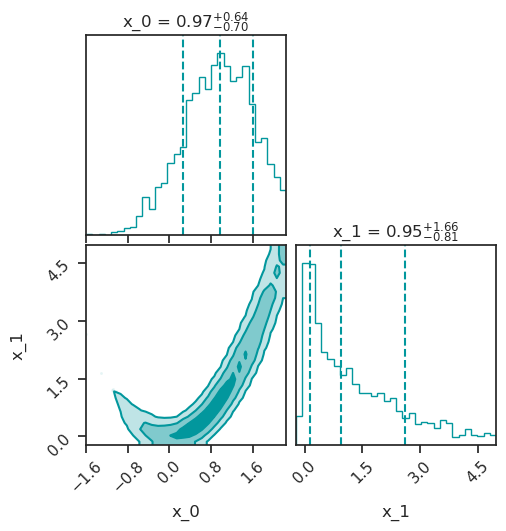

In [12]:
fig = corner_plot(sampler.posterior_samples, include=model.names)

## Diagnostics

We can also look at some of the diagnostic plots that are produced.

### Trace plot

Since the prior-volume (X) is not computed, we can't produce a traditional trace plot. However, we can plot samples against $\log (\pi / Q)$ which is refered to as `logW` in the sampler.

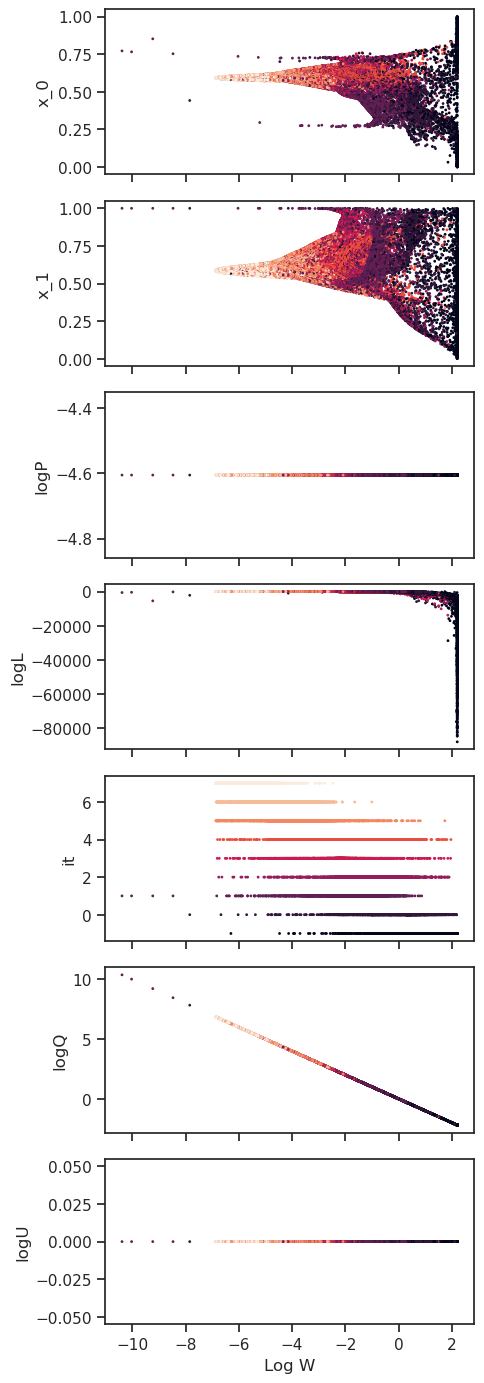

In [13]:
fig = sampler.ns.plot_trace()

### State plot

We can also produce a **state** plot which that state of the sampler at each iteration. If plotting is enabled, this plot is produced during the run and can be useful for understanding the current state of the sampler.

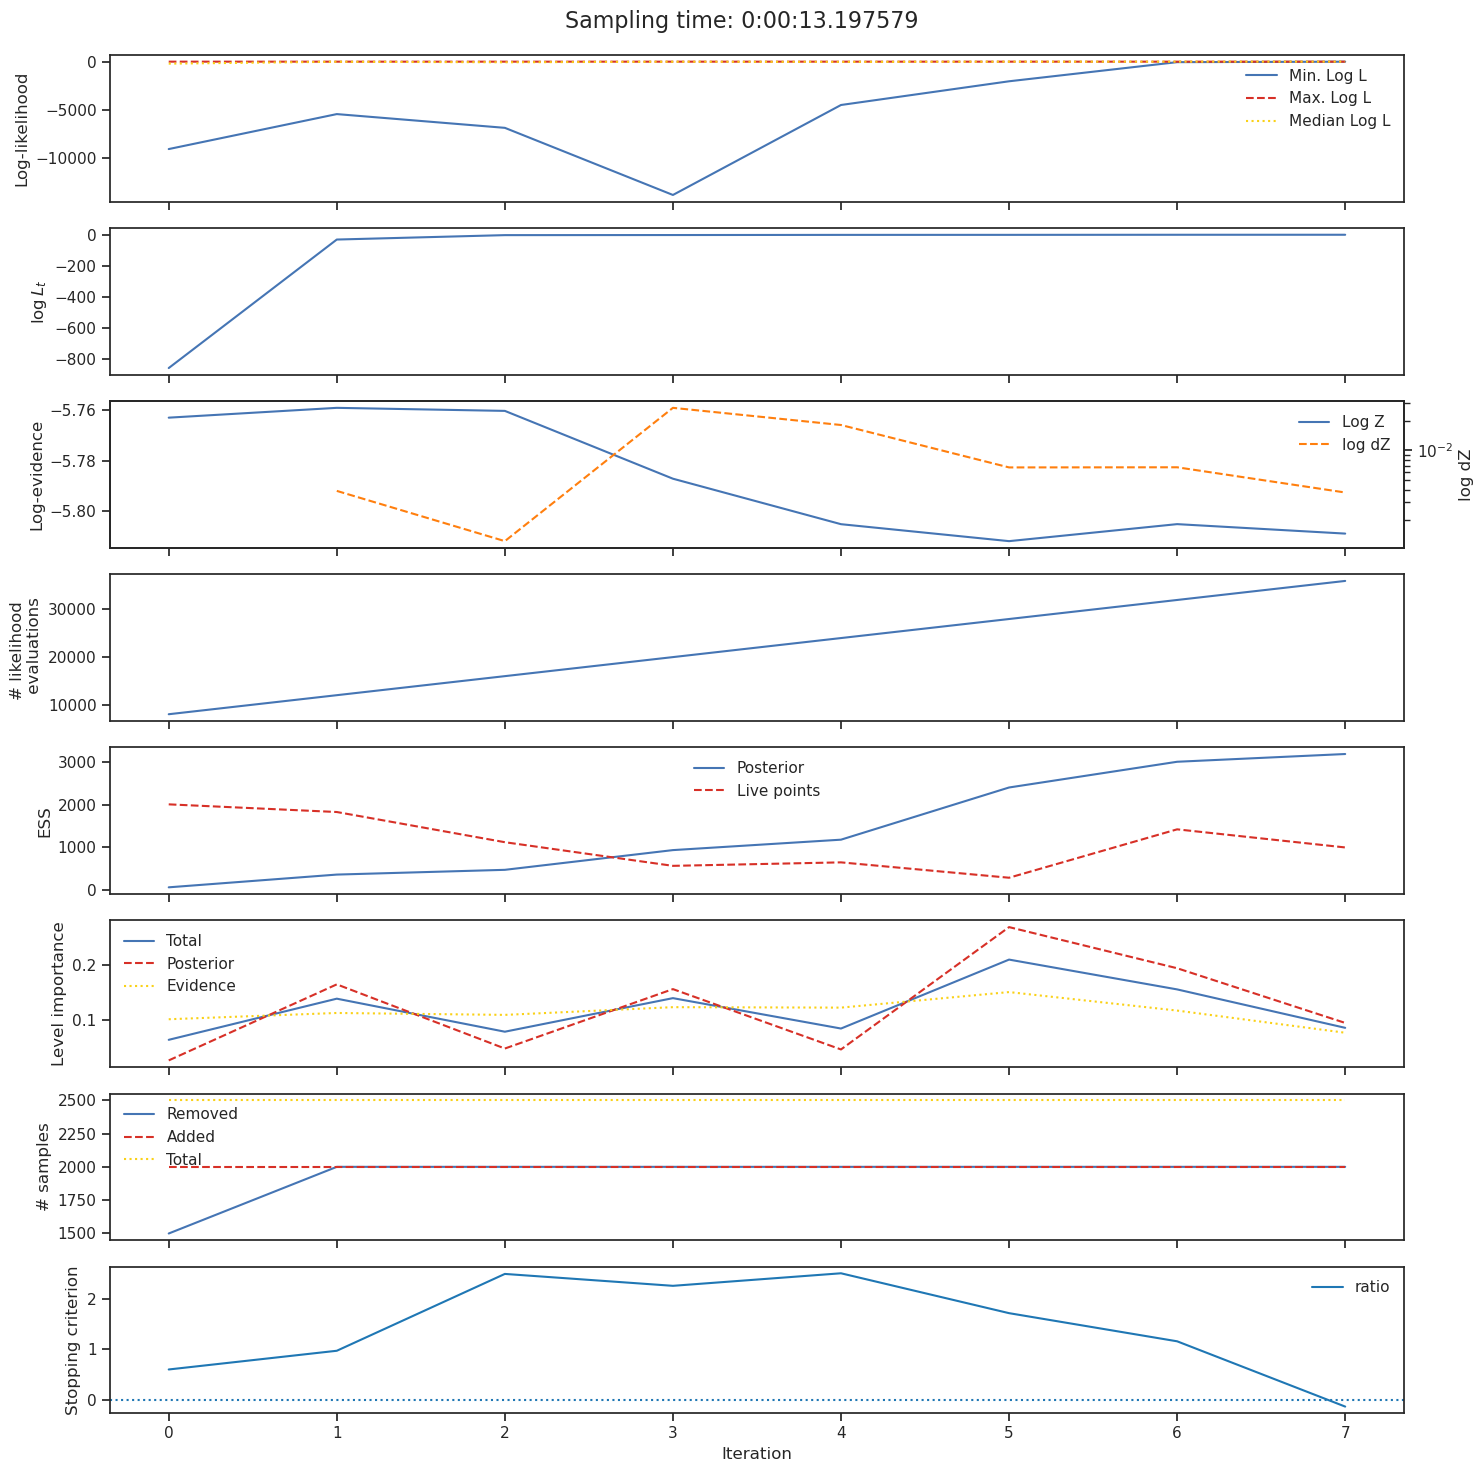

In [14]:
fig = sampler.ns.plot_state()